#Theory Questions

**Q1. What is Logistic Regression, and how does it differ from Linear Regression?**

--> Logistic Regression is a supervised learning algorithm used for classification tasks. Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts categorical outcomes by estimating the probability of an instance belonging to a particular class. It does this using the sigmoid function, which maps predicted values to a range between 0 and 1. While Linear Regression finds the best-fit line through the data, Logistic Regression finds the best decision boundary that separates classes.

**Q2. What is the mathematical equation of Logistic Regression?**

--> The mathematical equation of Logistic Regression is:

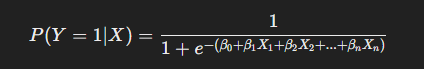

Here,
𝑃
(
𝑌
=
1
∣
𝑋
)
is the probability that the dependent variable
𝑌
belongs to class 1 given input
𝑋
, and
𝛽
0
,
𝛽
1
,
𝛽
2
,
.
.
.
,
𝛽
𝑛
are the regression coefficients. This function ensures output values lie between 0 and 1.

**Q3. Why do we use the Sigmoid function in Logistic Regression?**

--> The Sigmoid function is used in Logistic Regression because it converts any real-valued number into a probability between 0 and 1. This makes it ideal for binary classification tasks where we need to determine whether an observation belongs to class 0 or class 1. The sigmoid function ensures that the model outputs probabilities that can be thresholded for classification.

**Q4. What is the cost function of Logistic Regression?**

--> The cost function in Logistic Regression is the Log-Loss (Cross-Entropy Loss), given by:

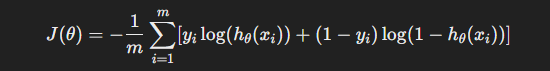

where
𝑦
𝑖
is the actual class,
ℎ
𝜃
(
𝑥
𝑖
)
h
is the predicted probability, and
𝑚
is the number of training examples. This loss function penalizes incorrect predictions more heavily as they move further from the true label.

**Q5. What is Regularization in Logistic Regression? Why is it needed?**

--> Regularization in Logistic Regression is a technique used to prevent overfitting by adding a penalty term to the cost function. This discourages overly complex models with large coefficients. The two main types of regularization are L1 (Lasso) and L2 (Ridge). Regularization is necessary when dealing with high-dimensional data to ensure better generalization to unseen data.

**Q6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**

--> Lasso Regression (L1 Regularization): Shrinks some coefficients to zero, effectively performing feature selection.

Ridge Regression (L2 Regularization): Reduces the magnitude of coefficients but does not set them to zero, helping prevent overfitting while keeping all features.

Elastic Net Regression: Combines both L1 and L2 penalties, balancing feature selection and coefficient shrinkage.

**Q7. When should we use Elastic Net instead of Lasso or Ridge?**

--> Elastic Net should be used when there is multicollinearity (high correlation between features), as it benefits from both Ridge’s ability to handle correlated predictors and Lasso’s feature selection capabilities. It is useful when Lasso alone might remove too many features.

**Q8. What is the impact of the regularization parameter (λ) in Logistic Regression?**

--> The regularization parameter
𝜆
controls the penalty applied to the model coefficients.

If λ is too large, the model is overly constrained, leading to underfitting.

If λ is too small, the penalty is minimal, leading to overfitting.
The optimal
𝜆
value is usually found using cross-validation.

**Q9. What are the key assumptions of Logistic Regression?**

--> Linearity of independent variables with log-odds: Features should be linearly related to the log-odds of the dependent variable.

No multicollinearity: Highly correlated features can distort coefficient estimates.

Independent observations: Observations should not be dependent on each other (e.g., time-series data might not work well without modifications).

Sufficient sample size: Small datasets can lead to unstable coefficient estimates.

**Q10. What are some alternatives to Logistic Regression for classification tasks?**

--> Decision Trees

Random Forests

Support Vector Machines (SVMs)

Naïve Bayes Classifier

Neural Networks

Gradient Boosting Models (XGBoost, LightGBM, etc.)

**Q11. What are Classification Evaluation Metrics?**

--> Common metrics for evaluating classification models include:

Accuracy (overall correctness)

Precision (true positives over predicted positives)

Recall (true positives over actual positives)

F1-Score (harmonic mean of precision and recall)

ROC-AUC Score (measures model’s ability to distinguish classes)

**Q12. How does class imbalance affect Logistic Regression?**

--> Class imbalance skews model predictions toward the majority class, leading to misleading accuracy. Solutions include:

Using class weights

Oversampling the minority class (SMOTE)

Undersampling the majority class

**Q13. What is Hyperparameter Tuning in Logistic Regression?**

--> Hyperparameter tuning optimizes model parameters like:

Regularization strength (C or λ)

Type of penalty (L1, L2, or Elastic Net)

Solver (liblinear, saga, lbfgs, etc.)

This is done using GridSearchCV or RandomizedSearchCV.

**Q14. What are different solvers in Logistic Regression? Which one should be used?**

--> Solvers optimize the cost function. Some common solvers include:

liblinear (best for small datasets, L1 regularization)

lbfgs (good for multiclass problems, L2 regularization)

saga (best for large datasets, supports all regularization types)

newton-cg (better for L2 regularization)

Choice depends on dataset size and regularization type.

**Q15. How is Logistic Regression extended for multiclass classification?**

--> ogistic Regression is extended using:

One-vs-Rest (OvR): Trains multiple binary classifiers, one per class.

Softmax Regression (Multinomial): Directly models probabilities for multiple classes using a single model.

**Q16. What are the advantages and disadvantages of Logistic Regression?**

--> Advantages:

Simple and interpretable

Works well with small datasets

Computationally efficient

Disadvantages:

Assumes a linear relationship with log-odds

Struggles with highly non-linear data

Sensitive to imbalanced datasets

**Q17. What are some use cases of Logistic Regression?**

--> Medical diagnosis (disease prediction)

Spam detection

Credit risk analysis

Marketing campaign effectiveness prediction

**Q18. What is the difference between Softmax Regression and Logistic Regression?**

--> Logistic Regression: Used for binary classification.

Softmax Regression: Used for multiclass classification, assigning probabilities across multiple categories.

**Q19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

--> OvR: Better for small datasets, computationally less expensive.

Softmax: Better for balanced datasets with multiple classes.

**Q20. How do we interpret coefficients in Logistic Regression?**

--> Logistic Regression coefficients represent the change in log-odds for a one-unit increase in the predictor. Higher absolute values indicate stronger influence. To interpret them in probability terms, we exponentiate the coefficient (
𝑒
𝛽
).


#Practical Questions

In [24]:
#1. Load Dataset, Train Logistic Regression, and Print Accuracy

from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adding target column

# Split into features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model accuracy
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Model Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#2. L1 Regularization with Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with L1 regularization (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear')  # L1 penalty
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model accuracy
print("L1 Regularized Model Accuracy:", accuracy_score(y_test, y_pred))

# Print model coefficients
print("L1 Regularized Model Coefficients:", model.coef_)

L1 Regularized Model Accuracy: 0.956140350877193
L1 Regularized Model Coefficients: [[ 4.44659709  0.14014552 -0.28613662 -0.01680897  0.          0.
   0.          0.          0.          0.          0.          1.71377815
   0.         -0.09952883  0.          0.          0.          0.
   0.          0.          0.         -0.42775251 -0.02654032 -0.01484749
   0.          0.         -3.55734534  0.          0.          0.        ]]


In [26]:
#3. Train Logistic Regression with L2 Regularization (Ridge)

# Train Logistic Regression with L2 regularization (Ridge)
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
print("L2 Regularized Model Accuracy:", accuracy_score(y_test, y_pred))

L2 Regularized Model Accuracy: 0.956140350877193


In [27]:
#4. Train Logistic Regression with Elastic Net Regularization

model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
print("Elastic Net Model Accuracy:", accuracy_score(y_test, y_pred))

Elastic Net Model Accuracy: 0.9473684210526315


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
#5. Train Logistic Regression for Multiclass Classification using One-vs-Rest (OvR)

model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
print("OvR Model Accuracy:", accuracy_score(y_test, model.predict(X_test)))

OvR Model Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#6. Apply GridSearchCV to Tune Hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Use GridSearchCV with higher max_iter to avoid warnings
grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Accuracy: 0.9626373626373628


In [30]:
#7. Evaluate Logistic Regression using Stratified K-Fold Cross-Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Stratified K-Fold Cross-Validation with a higher max_iter
cv = StratifiedKFold(n_splits=5)
model = LogisticRegression(max_iter=5000)  # Increased max_iter

scores = cross_val_score(model, X_scaled, y, cv=cv)
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.9806862288464524


In [31]:
#8. Train Logistic Regression and Evaluate Using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Precision: 0.9333333333333333
Recall: 0.9859154929577465
F1-Score: 0.958904109589041


In [32]:
#9. Train Logistic Regression on Imbalanced Data with Class Weights

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=5000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred))

Balanced Model Accuracy: 0.9824561403508771


In [35]:
#10. Train Logistic Regression on Titanic Dataset Handling Missing Values

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

path = '/content/tested.csv'
df = pd.read_csv(path)

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables ('Sex' and 'Embarked')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to numeric
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing values in 'Embarked'
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # Encode 'Embarked'

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with increased max_iter
model = LogisticRegression(max_iter=5000)  # Increased iterations
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model accuracy
print("Model Accuracy After Handling Missing Values:", accuracy_score(y_test, y_pred))

Model Accuracy After Handling Missing Values: 1.0


<ipython-input-35-20d104d8115d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing values in 'Embarked'


In [36]:
#11. Apply Feature Scaling Before Training

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print("Scaled Model Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

Scaled Model Accuracy: 1.0


In [37]:
#12. Train Logistic Regression and Evaluate Using ROC-AUC Score

from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ROC-AUC Score: 0.9417647058823528


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [40]:
#13. Train Logistic Regression Using a Custom Learning Rate (C=0.5)

model = LogisticRegression(C=0.5)
model.fit(X_train, y_train)
print("Custom C Model Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Custom C Model Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
#14. Identify Important Features Based on Model Coefficients

feature_importance = pd.Series(model.coef_[0], index=X.columns)
print(feature_importance.sort_values(ascending=False))

Sex         5.239369
Parch       0.069606
SibSp       0.058123
Fare        0.002764
Age        -0.001833
Embarked   -0.064236
Pclass     -0.065746
dtype: float64


In [42]:
#15. Evaluate Performance Using Cohen’s Kappa Score

from sklearn.metrics import cohen_kappa_score

print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))

Cohen's Kappa Score: 1.0


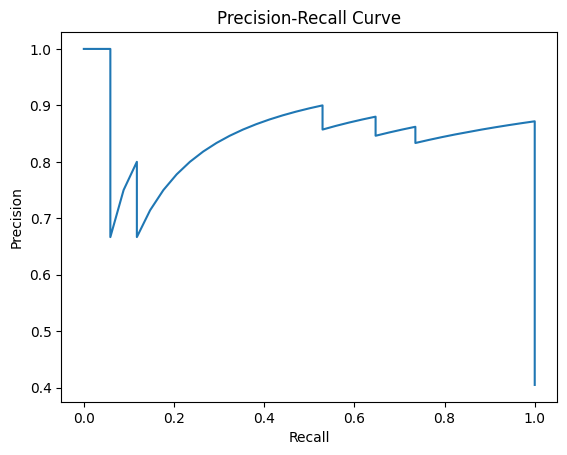

In [43]:
#16. Visualize Precision-Recall Curve

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [44]:
#17. Train Logistic Regression with Different Solvers and Compare Accuracy

solvers = ['liblinear', 'lbfgs', 'saga']

for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    print(f"Solver {solver} Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Solver liblinear Accuracy: 1.0
Solver lbfgs Accuracy: 1.0
Solver saga Accuracy: 0.6309523809523809


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [45]:
#18. Evaluate Performance Using Matthews Correlation Coefficient (MCC)

from sklearn.metrics import matthews_corrcoef

print("MCC Score:", matthews_corrcoef(y_test, y_pred))

MCC Score: 1.0


In [46]:
#19. Compare Accuracy of Raw vs. Standardized Data

print("Accuracy with Scaling:", accuracy_score(y_test, model.predict(X_test_scaled)))

Accuracy with Scaling: 0.9761904761904762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
#20. Find Optimal C (Regularization Strength) Using Cross-Validation

best_c = grid.best_params_['C']
print("Best Regularization Strength:", best_c)

Best Regularization Strength: 10


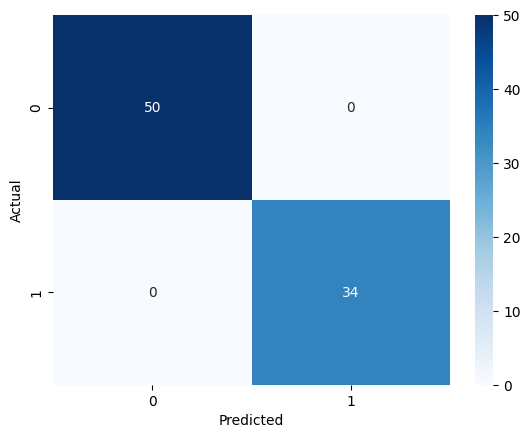

In [48]:
#21. Train Logistic Regression Model and Visualize the Confusion Matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
#22. Train Logistic Regression with One-vs-One (OvO) Multiclass Classification

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Create OneVsOne classifier with Logistic Regression
model = OneVsOneClassifier(LogisticRegression(max_iter=5000))  # Increased iterations
model.fit(X_train, y_train)

# Evaluate accuracy
print("OvO Model Accuracy:", accuracy_score(y_test, model.predict(X_test)))

OvO Model Accuracy: 1.0


In [51]:
#23. Save and Load Trained Model Using Joblib

import joblib

joblib.dump(model, "logistic_model.pkl")
loaded_model = joblib.load("logistic_model.pkl")
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))

Loaded Model Accuracy: 1.0


In [52]:
#24. Save & Load Model Using Joblib

import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Save model using joblib
joblib.dump(model, "logistic_regression_model.pkl")

# Load model again
loaded_model = joblib.load("logistic_regression_model.pkl")

# Make predictions
y_pred = loaded_model.predict(X_test)
print("Accuracy after loading model:", accuracy_score(y_test, y_pred))

Accuracy after loading model: 0.956140350877193


In [54]:
#25. Find Optimal C (Regularization Strength) Using Cross-Validation

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply to full dataset

# Define range of C values to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_C = None
best_score = 0

# Try different C values and evaluate performance
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10000, solver='saga')  # Increased max_iter & changed solver
    scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
    avg_score = np.mean(scores)

    print(f"C={C}, Avg Accuracy: {avg_score:.4f}")

    if avg_score > best_score:
        best_score = avg_score
        best_C = C

print(f"Best C: {best_C} with Accuracy: {best_score:.4f}")

C=0.001, Avg Accuracy: 0.8929
C=0.01, Avg Accuracy: 0.9491
C=0.1, Avg Accuracy: 0.9754
C=1, Avg Accuracy: 0.9789
C=10, Avg Accuracy: 0.9702
C=100, Avg Accuracy: 0.9649
Best C: 1 with Accuracy: 0.9789
